In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\arno\River_Arno.csv'

df = pd.read_csv(path)
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

## Data cleaning

It is of the utmost importance to notice that some features like rainfall and temperature, which are present in each dataset, don’t go alongside the date. Indeed, both rainfall and temperature affect features like level, flow, depth to groundwater and hydrometry some time after it fell down. This means, for instance, that rain fell on 1st January doesn’t affect the mentioned features right the same day but some time later. As we don’t know how many days/weeks/months later rainfall affects these features, this is another aspect to keep into consideration when analyzing the dataset.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

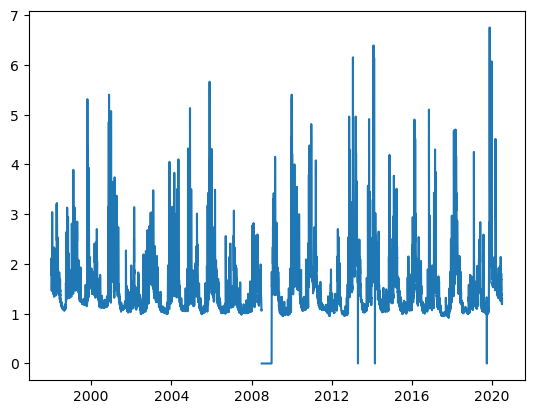

In [5]:
plt.plot(df['Date'], df['Hydrometry_Nave_di_Rosano']);

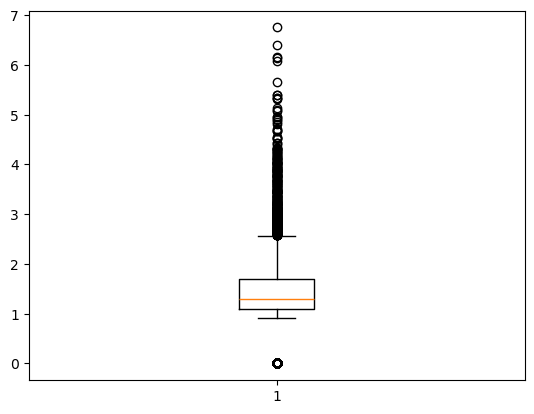

In [13]:
plt.boxplot(df['Hydrometry_Nave_di_Rosano'].dropna())
plt.show()

In [22]:
def get_extreme(array):
    q1 = np.quantile(array.dropna(), 0.25)
    q3 = np.quantile(array.dropna(), 0.75)

    print(f'Extreme Upper Limit: {round(q3 + 3*(q3-q1), 3)}')
    print(f'Upper Limit: {round(q3 + 1.5*(q3-q1), 3)}')
    print(f'Lower Limit: {round(q1 - 1.5*(q3-q1), 3)}')
    print(f'Extreme Lower Limit: {round(q1 - 3*(q3-q1), 3)}')

In [23]:
get_extreme(df['Hydrometry_Nave_di_Rosano'])

Extreme Upper Limit: 3.46
Upper Limit: 2.575
Lower Limit: 0.215
Extreme Lower Limit: -0.67


In [29]:
print((df['Hydrometry_Nave_di_Rosano'].dropna() < 0.215).sum())
print((df['Hydrometry_Nave_di_Rosano'].dropna() == 0).sum())

187
187


In [31]:
# Strange, the Hydrometry is 0 meters. More likely than not, this is not correct.
# Also because, on the web, I see no reason why on 2008-07-03 the level is 0.

df.loc[df['Hydrometry_Nave_di_Rosano']==0, 'Date'].max()

Timestamp('2019-09-27 00:00:00')

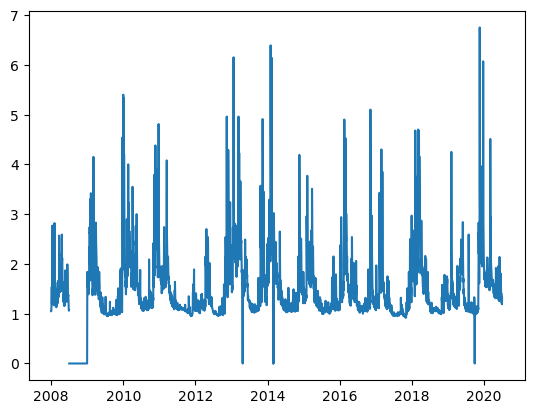

In [33]:
plt.plot(df.loc[df['Date'] > pd.to_datetime('2008-01-01'), 'Date'],
         df.loc[df['Date'] > pd.to_datetime('2008-01-01'), 'Hydrometry_Nave_di_Rosano']);

Fill the values that are == 0 for the Hydrometry.

In [41]:
# Back-up copy
df['Hydrometry'] = df['Hydrometry_Nave_di_Rosano'].copy()

df.loc[df['Hydrometry_Nave_di_Rosano']==0, 'Hydrometry_Nave_di_Rosano'] = np.nan
nan_idx = df[df['Hydrometry_Nave_di_Rosano'].isna()].index.to_list()

In [62]:
# Map the start and the end of a sequence of nan values.

start_end_nan = []
start = None

for i in range(len(nan_idx)):
    if not start:
        start = nan_idx[i]
    
    j = i+1
    if i == len(nan_idx)-1:
        start_end_nan.append([start, nan_idx[i]])
        break

    if nan_idx[i] + 1 == nan_idx[j]:
        pass
    else:
        start_end_nan.append([start, nan_idx[i]])
        start = None

# Check to see if we got all the nan values inside our list of lists
sum = 0

for i in start_end_nan:
    sum += i[1]-i[0]+1

sum, df['Hydrometry_Nave_di_Rosano'].isna().sum()

(235, 235)

In [64]:
# Fill the nan values

for lista in start_end_nan:
    value1 = df.loc[lista[0]-1, 'Hydrometry_Nave_di_Rosano']
    value2 = df.loc[lista[1]+1, 'Hydrometry_Nave_di_Rosano']
    length = lista[1] - lista[0] + 1

    if length == 1:
        df.loc[lista[0], 'Hydrometry_Nave_di_Rosano'] = np.mean([value1, value2])
    else:
        delta = (value2 - value1)/length
        prev = value1
        for idx in range(lista[0], lista[1]+1):
            df.loc[idx, 'Hydrometry_Nave_di_Rosano'] = prev + delta
            prev += delta



In [77]:
df.loc[((df['Hydrometry'].isna()) | (df['Hydrometry'] == 0)), 'Date']

344    1998-12-11
345    1998-12-12
346    1998-12-13
347    1998-12-14
348    1998-12-15
          ...    
5591   2013-04-23
5900   2014-02-26
5902   2014-02-28
7939   2019-09-27
8160   2020-05-05
Name: Date, Length: 235, dtype: datetime64[ns]

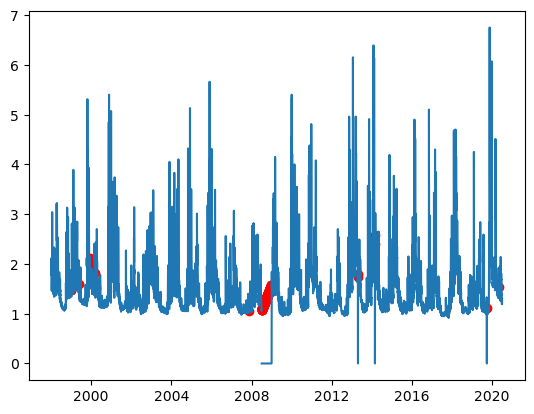

In [81]:
plt.plot(df['Date'],
         df['Hydrometry'])

plt.scatter(df.loc[((df['Hydrometry'].isna()) | (df['Hydrometry'] == 0)), 'Date'],
         df.loc[((df['Hydrometry'].isna()) | (df['Hydrometry'] == 0)), 'Hydrometry_Nave_di_Rosano'],
         color='red');